In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = [20, 10]

In [140]:
data = pd.read_csv("Data/CashierData.csv", sep=";", decimal=",")
fake_data_noshift = pd.read_csv("fake_data_CTGAN_noshift.csv")

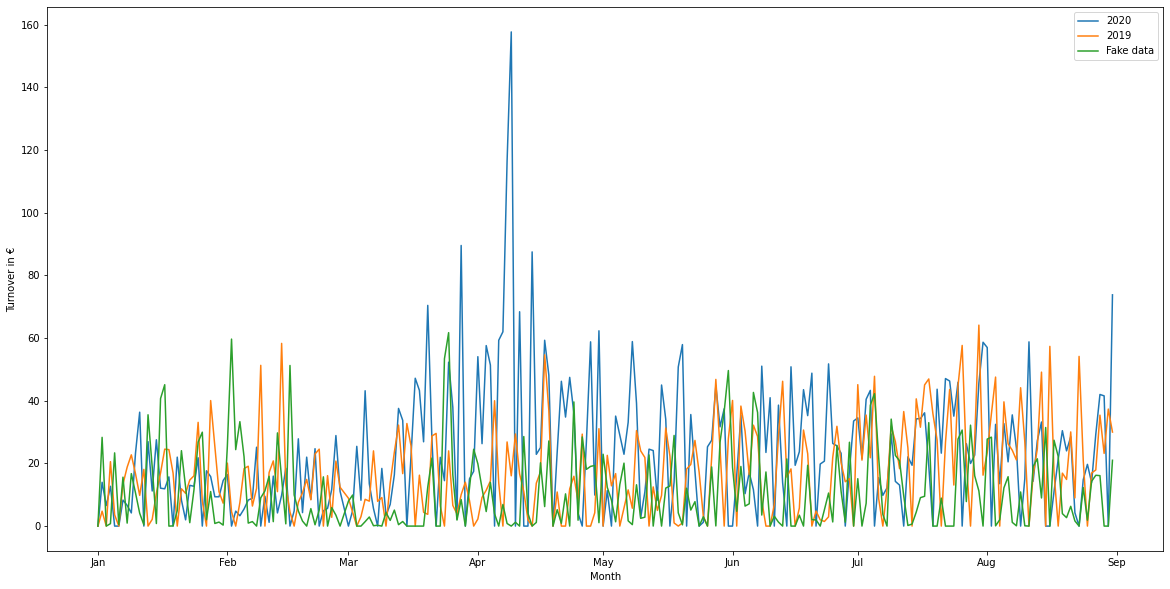

In [141]:
data2020 = data[data["Date"].astype("str").str.contains("2020")]
data2020 = data2020[data2020.Date != "2020-02-29"]
date2020 = pd.to_datetime(data2020["Date"])

mask2019 = (data['Date'] >= "2019-01-01") & (data['Date'] <= "2019-08-31")
data2019 = data.loc[mask2019]
date2019 = pd.to_datetime(data2019["Date"])

fakedata = fake_data_noshift.head(243)

fig, ax = plt.subplots()
ax.plot(date2020,data2020["FruitsVegs"],label="2020")
ax.plot(date2020,data2019["FruitsVegs"],label="2019")
ax.plot(date2020,fakedata["FruitsVegs"],label="Fake data")
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.xlabel("Month")
plt.ylabel("Turnover in €")
  
ax.legend()